# Decision Tree

This notebook demonstrates how to build a decision tree model to classify data or predict outcomes based on input features.

**Usage:** to assign data to categories or predict values by learning decision rules from observed data.

**Import the necessary libraries**

In [150]:
import pandas as pd # used for data manipulation and analysis
import numpy as np
from sklearn import tree # used for building decision trees
import pydotplus # used for visualizing decision trees

**Generate a decision tree.**

In [151]:
def generate_decision_tree(X, y):
    """
    Generate a decision tree classifier and return the trained model.
    
    Parameters:
    X (DataFrame): Features for training the model.
    y (Series): Target variable for training the model.
    
    Returns:
    DecisionTreeClassifier: Trained decision tree model.
    """
    classifier = tree.DecisionTreeClassifier()  # Create a decision tree classifier
    classifier.fit(X, y)  # Fit the model to the data
    return classifier

**Saving the generated tree diagram**

In [152]:
def showtree2pdf(trainedTree,finename):
 dot_data = tree.export_graphviz(trainedTree, out_file=None) # Export the tree in Graphviz format.
 graph = pydotplus.graph_from_dot_data(dot_data)
 graph.write_pdf(finename) # Save the tree diagram to the local machine in PDF format.

**Display the standardized data**

In [153]:
def generate_vectorized_data(dataset, target_column):
    """
    Generate vectorized data from the DataFrame.
    
    Parameters:
    df (DataFrame): Input DataFrame containing features and target variable.
    target_column (str): Name of the target variable column.
    
    Returns:
    tuple: Features (X) and target variable (y).
    """
    X = dataset.drop(columns=[target_column])  # Features
    y = dataset[target_column]  # Target variable
    return X, y

**Invoke the function for prediction**

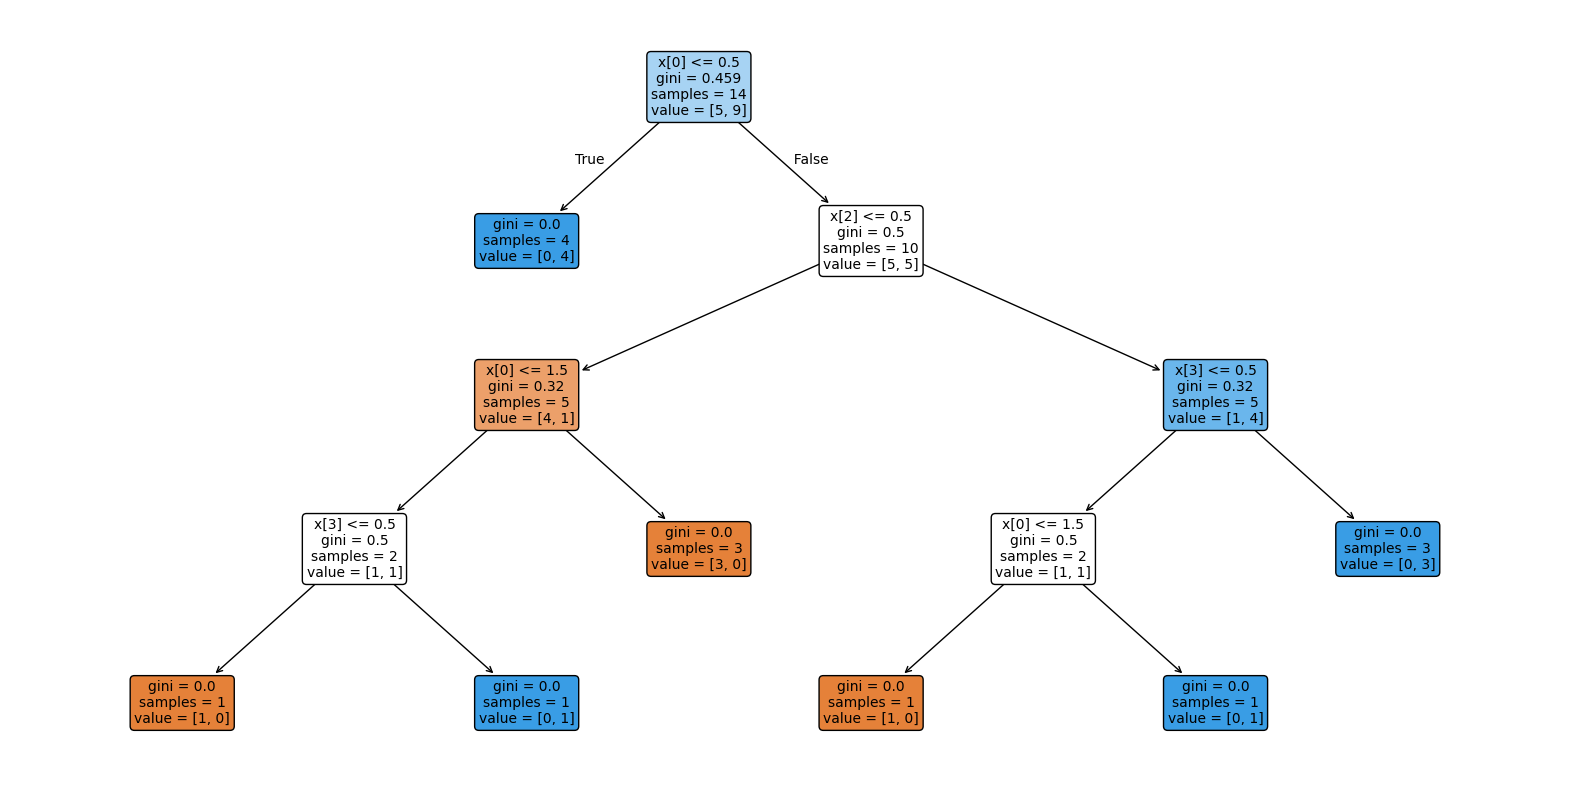

In [154]:
data = pd.read_table("tennis.txt",header=None,sep='\t') # Read training data.

  # Convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
      if data[col].dtype == 'object':
          le = LabelEncoder()
          data[col] = le.fit_transform(data[col])

trainingvec=generate_vectorized_data(data, 4) # Vectorize data (target is column 4).
decisionTree=generate_decision_tree(trainingvec[0], trainingvec[1]) # Create a decision tree.

  # showtree2pdf(decisionTree,"tennis.pdf") # draw the decision tree and save it as pdf file.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10)) # Set the figure size for visualizing the decision tree
plot_tree(decisionTree, filled=True, rounded=True, fontsize=10) # draw the decision tree
plt.show()

X[2], X[0], and X[3] represent feature variables (e.g., X[2] = humidity, X[0] = weather, X[3] = wind).

Entropy shows the entropy value at each node, indicating the node’s purity or impurity.

Samples indicates the number of samples at that node (e.g., 14 in the root node = all training samples).

Value shows the number of samples for each class label at a node (e.g., in the root: 5 “no”, 9 “yes”).